<h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 9</h6>
<h6 align="center">Faktoryzacja QR</h6>
<h6 align="center">21 maja 2020</h6>

In [1]:
from numpy.linalg import qr
import numpy as np
import math
import matplotlib.pyplot as pyplot

<b>Zadanie 1 Faktoryzacja QR metodą Grama-Schmidta</b> <br><hr>
 Napisz funkcję dokonującą faktoryzacji QR macierzy A∈Rn×n,A = [a1,a2,...,an] (ai to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji GramaSchmidta 

In [2]:
def gram_schmid_qr(A,n):
    A = np.array(A)
    for i in range(n):
        A[i] = np.array(A[i])
    A = np.matrix.transpose(A)

    U0 = A[0]/np.linalg.norm(A[0])
    U0 = np.array(U0)
    U = []
    U.append(U0)
    for k in range(1,n):

        sum_vec =  np.array([np.float(0) for l in range(n)])
        for i in range(k):
            sum_vec = sum_vec + (np.dot(U[i],A[k])*U[i])
        U.append(A[k] - sum_vec)
        U[k] =  U[k]/np.linalg.norm(U[k])

    Q =[]
    for i in range(n):
        Q.append(U[i])

    Q = np.array(Q)
    Q = np.matrix.transpose(Q)

    R = [[0 for j in range(n)] for i in range(n)]

    for k in range(n):
        for i in range(k+1):
            R[i][k] = np.dot(U[i],A[k])

    return Q,np.array(R)

2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze. 

Funckja porównująca macierze

In [3]:
def are_equals(A,B, delta):
    for i,e in enumerate(A):
        for j,f in enumerate(A[i]):
            if(math.fabs(math.fabs(A[i][j]) - math.fabs(B[i][j])) > delta):
                return False
    return True

Porównanie rezultatów z funkcją biblioteczną:

In [4]:
for i in range(5):
    A = np.random.rand(i+1,i+1)
    print(A)
    Q,R = gram_schmid_qr(A,i+1)
    q,r = qr(A)

    print(Q)
    print(R)
    print()
    print(q)
    print(r)

    print("Are equals Q?: ",are_equals(Q,q,0.001))
    print("Are equals R?: ",are_equals(R,r,0.001))

[[0.08491831]]
[[1.]]
[[0.08491831]]

[[1.]]
[[0.08491831]]
Are equals Q?:  True
Are equals R?:  True
[[0.16748995 0.86149174]
 [0.91655071 0.2316322 ]]
[[ 0.17976261  0.98371002]
 [ 0.98371002 -0.17976261]]
[[0.93172855 0.38272291]
 [0.         0.80581925]]

[[-0.17976261 -0.98371002]
 [-0.98371002  0.17976261]]
[[-0.93172855 -0.38272291]
 [ 0.         -0.80581925]]
Are equals Q?:  True
Are equals R?:  True
[[0.38405546 0.42129636 0.22222895]
 [0.30980639 0.57298216 0.78354909]
 [0.16725282 0.55350027 0.71276943]]
[[ 0.73713553 -0.53666413 -0.4106371 ]
 [ 0.59462582  0.22646152  0.77145013]
 [ 0.32101611  0.81283872 -0.48604719]]
[[0.52101066 0.82894501 0.85854185]
 [0.         0.35357022 0.63754801]
 [0.         0.         0.16677402]]

[[-0.73713553  0.53666413  0.4106371 ]
 [-0.59462582 -0.22646152 -0.77145013]
 [-0.32101611 -0.81283872  0.48604719]]
[[-0.52101066 -0.82894501 -0.85854185]
 [ 0.         -0.35357022 -0.63754801]
 [ 0.          0.         -0.16677402]]
Are equals Q?: 

Jak widać wszystkie obliczone macierze są takie same

3. Wygeneruj 30-50 przykładowych macierzy 8×8 o różnym wskaźniku uwarunkowania cond(Ai) (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

In [5]:
Matixes = []
cond_m = []
for i in range(500):
    strength = 10000
    cond = (i+1)*strength
    S =  np.random.rand(8,8)
    s,v,d = np.linalg.svd(S)
    v[7] = v[0]/cond
    M = np.dot(s,np.dot(np.diag(v),d))
    Matixes.append(S)
    cond_m.append(cond)

4. Dla każdej z uzyskanych w ten sposób macierzy Ai wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji (Ai = QiRi). Przedstaw zależnośćk ||I−QT*Q|| od cond(Ai).

Do obliczeń zostałą wykożystana Norma Frobeniusa

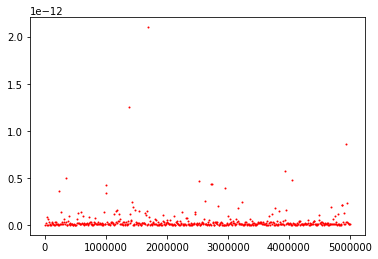

In [7]:
diff = []
# Norma Frobeniusa
for m in Matixes:

    Q, R = gram_schmid_qr(m,len(m))
    I = np.diag([1 for i in range(8)])
    dif = I - np.dot(np.matrix.transpose(Q),Q)
    suma = 0
    for i in dif:
        for j in i:
            suma = suma +  math.fabs(j*j)
    diff.append(math.sqrt(suma))

pyplot.plot(cond_m,diff,'ro',markersize=1)
pyplot.show()

5. Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżności? Od czego zależy wielkość rozbieżności?

Na wykresie można zauważyć, że błąd jest stały bliski zeru. Nie wiem czy to błąd obliczeń, czy po prostu ta metoda jest taka dobra.

<b>Zadanie 2 Rozwiązywanie układów równań metodą QR</b> <br><hr>
Bezpośrednie rozwiązywanie układu równań przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz A jest źle uwarunkowana (jej współczynnik uwarunkowania jest wysoki). Lepszym sposobem jest wykorzystanie dekompozycji QR w tym celu.

1. Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR korzystając z własności macierzy ortogonalnych: A^T = A^−1, a także z mechanizmu back substitution. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci:

f(x) = c + bx + ax^2

 Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f).

<table style="width:100%">
  <tr>
    <th>x</th>
    <th>-5</th>
    <th>-4</th>
    <th>-3</th>
    <th>-2</th>
    <th>-1</th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <th>y</th>
    <th>2</th>
    <th>7</th>
    <th>9</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>14</th>
    <th>13</th>
    <th>10</th>
    <th>8</th>
    <th>4</th>
  </tr>
</table>

* Funkcja rozwiazująca ukłąd równań wykorzystująca QR

In [9]:
def slove_qr(A,B):
    Q, R = gram_schmid_qr(A,len(A))
    v = np.dot(np.matrix.transpose(Q),B)
    l = np.dot(np.dot(np.matrix.transpose(Q),Q),R)

    #  back substitution
    for i in range(len(A)):
        v[i] = v[i]/l[i][i]
        l[i] = l[i]/l[i][i]


    for i in range(len(B) -1,-1,-1):
        print(i)
        for j in range(i+1,len(A)):
            v[i] = v[i] - v[j]*l[i][j]

    return v

Rozwiązanie przykłądowego ukłądu równań do sprawdzenia poprawnośći

\begin{equation*}
\left\{\begin{matrix} 
x + y + z = 6
\\ x + 2y + 3z = 14
\\ 2x + y + z = 7
\end{matrix}\right.
\end{equation*}


In [11]:
A = [[1,1,1],[1,2,3],[2,1,1]]
b = [6,14,7]

res = slove_qr(A,b)
print(res)

2
1
0
[1. 2. 3.]


Funkcja jest poprawna wynik zgadza się z oczekiwaniami

Stałe z zadania:

In [12]:
N = 11
M = 3
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y = [2,7,9,12,13,14,14,13,10,8,4]

In [13]:
# Obliczanie współczynnikow s i t
S = []
T = []
for i in range(0,2*M -1):
    suma = 0
    for j in range(0,N):
        mult = 1
        for k in range(0,i):
            mult *= x[j]
        suma += mult

    S.append(suma)

for i in range(M):
    suma = 0
    for j in range(0,N):
        mult = y[j]
        for k in range(0,i):
            mult *= x[j]
        suma += mult

    T.append(suma)

In [14]:
# Ulozenie macierzy

X = []
for i in range(M):
    X.append([])
    for j in range(i,i+M):
        X[i].append(S[j])

print(X)

[[11, 0, 110], [0, 110, 0], [110, 0, 1958]]


Rozwiązanie ukłądów równań:

In [15]:
A = slove_qr(X,T)

print(A)

c = A[0]
b = A[1]
a = A[2]

func = lambda x : a*x*x + b*x + c

2
1
0
[13.97202797  0.18181818 -0.43356643]


Wizualizacja:

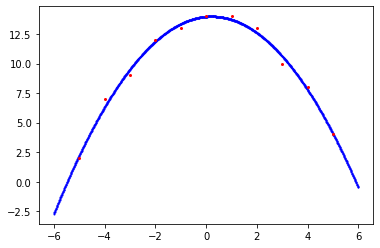

In [17]:
res_x = []
res_y = []

start = min(x) -1
end = max(x) + 1
div = 1000
x_tmp = min(x) - 1
for i in range(div):
    res_x.append(x_tmp)
    res_y.append(func(x_tmp))
    x_tmp += (end -start)/div


pyplot.plot(res_x,res_y,'bo',markersize=1)
pyplot.plot(x,y,'ro',markersize=2)
pyplot.show()

Wnioski: <br>
* Faktoryzacja QR ma bardzo dużą zaletę: macierz R jest trójkątną górną co ułatwia wiele obliczeń natomiast macierez Q jest ortogonalna co również ułatwia obliczenia
* Dekompozycja QR jest często używana do rozwiązywania liniowego problemu najmniejszych kwadratów, jest również podstawą do iteracyjnego liczenia wartości własnych macierzy.

Źródła: <br> https://eti.pg.edu.pl/documents/176593/26763380/Wykl_AlgorOblicz_3.pdf